In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import plot_distribution

import numpy as np


In [2]:
#Defyning  pi

pi = np.pi

In [3]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


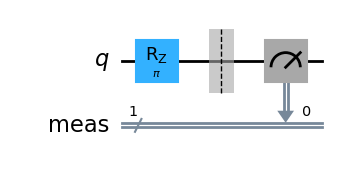

In [4]:
#initializing  quantum circuit

qc = QuantumCircuit(1)   #N = 1 qubits and 1 classical bit. If we do not define the number of classical bits, it will the same as the qubits

#Aplying a pi rotation in the x direction using rx-gate

qc.rz(pi,0)

qc.measure_all()

qc.draw("mpl")


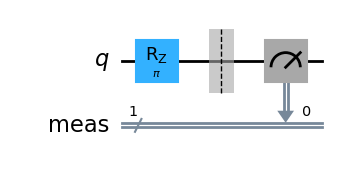

In [5]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [6]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. 
#In this case, measure "meas". See circuit  


#counts
print('RESULT ', counts)




#Vamos executar o circuito para o backend acima 8192 vezes

#job = execute(circuit, backend, shots=8192)

RESULT  {'0': 1000}


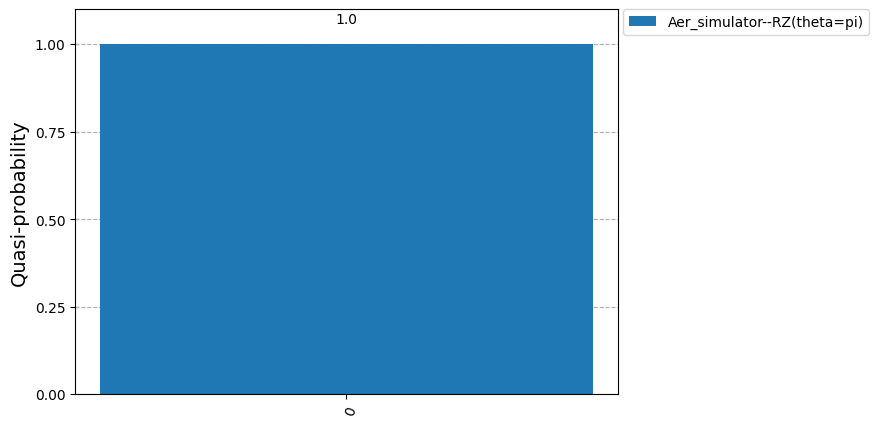

In [7]:

plot_distribution([counts], legend = ['Aer_simulator--RZ(theta=pi)'])

In [8]:
#A rotation of pi around z-axis does not changes the qubit